## Data Processing

**Data Type** <br/>
* 名稱型 (nominal)
* 次序型 (ordinal)
* 區間型 (interval)
* 比例型 (ratio) <br/>
...

資料預處理的目的，就是在收集資料之後、開始進行分析之前，先行經過整理、清除，讓我們所使用的資料能有一定的可信度。這項工作是很重要的，因為資料分類與處理的品質，將會影響最後數據分析的結果。

- data cleaning
   noise, outlier, redundant data, missing values, ...
- data integration
- data transformation
- dimensionality reduction

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Use this line to see plots in the notebook
%matplotlib inline

**Fake data csv files**

In [3]:
df1 = pd.read_csv('/Users/vv41020tw/Downloads/df1',index_col=0)
df2 = pd.read_csv('/Users/vv41020tw/Downloads/df2')

In [4]:
df1.head()

,A,B,C,D
2000-01-01,1.339091,-0.163643,-0.646443,1.041233
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
2000-01-04,-1.738808,-0.072973,0.056517,0.015085
2000-01-05,-0.905980,1.778576,0.381918,0.291436


In [5]:
df2.head()

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008


**Histogram** 直方圖

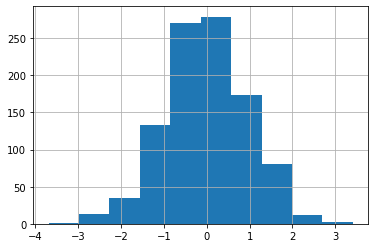

In [6]:
df1['A'].hist()

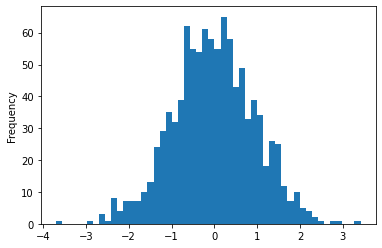

In [7]:
df1['A'].plot.hist(bins=50)
# 資料條狀大小調整(bins=50)

**Barplot**長條圖 <br/>
DataFrame裡的列索引會在x軸，欄索引鍵會在y軸。

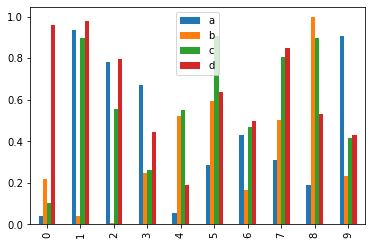

In [8]:
df2.plot.bar()

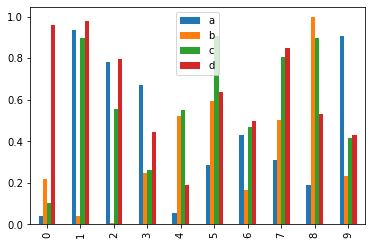

In [9]:
# alternative
df2.plot(kind='bar')

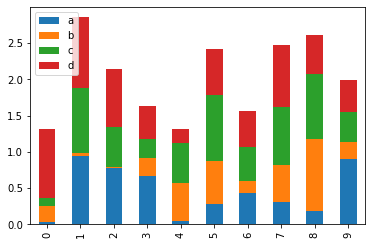

In [10]:
df2.plot.bar(stacked=True)

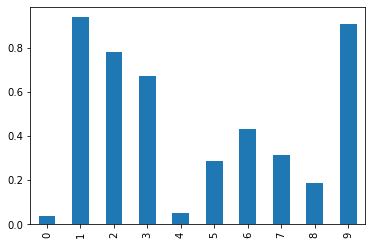

In [11]:
df2['a'].plot(kind='bar')

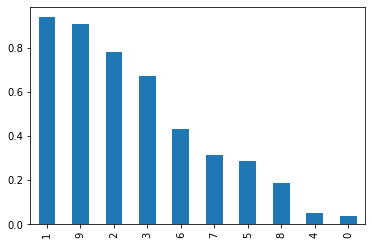

In [12]:
df2['a'].sort_values(ascending=False).plot(kind='bar')

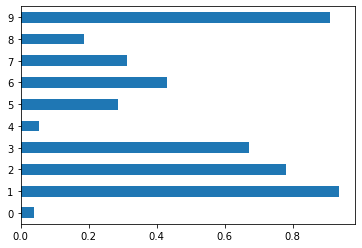

In [13]:
df2['a'].plot(kind='barh')

**Pie Chart**圓餅圖 <br/>
當資料用圓餅圖呈現時，可以看出它占總體的百分比。

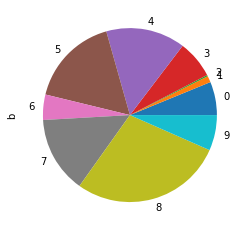

In [14]:
df2['b'].plot(kind='pie')

**BoxPlot**箱形圖 <br/>
中間箱子的兩端為第一四分位數（涵蓋25%之資料，Q1）與第三四分位數（涵蓋75%之資料，Q3），而箱子中間線為中位數（median）。<br/>
換言之，箱子涵蓋50%的資料。箱型外的圓圈，則是被判定成「異常值」。

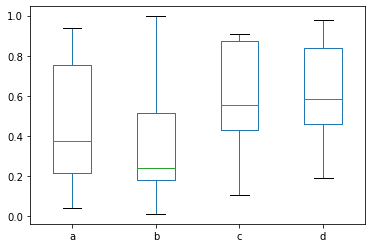

In [15]:
df2.plot.box()

**Kernel Density Estimation plot (KDE)**

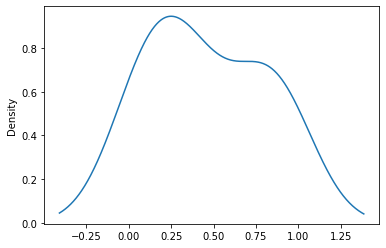

In [16]:
df2['a'].plot.kde()

**Line Plot**折線圖

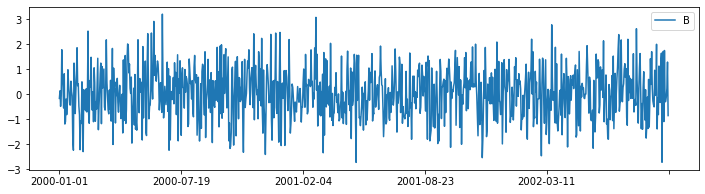

In [17]:
df1.plot.line(y='B',figsize=(12,3))
# 資料的圖的大小figsize=(12,3)

In [18]:
import seaborn as sns

**下載seaborn內建的資料集tips，這個資料集紀錄了餐廳客人給得小費以及相關的基本資料。**

In [19]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


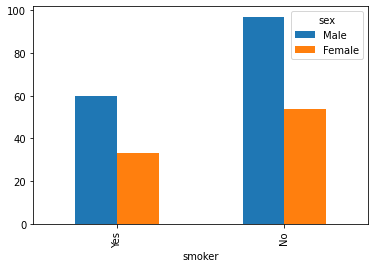

In [20]:
tips.groupby(['smoker','sex']).size().unstack(1).plot(kind='bar')

sex
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_bill, dtype: object

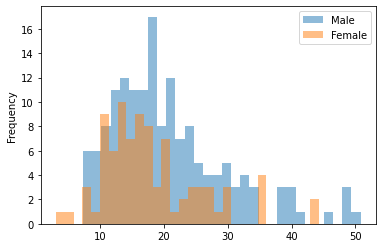

In [21]:
tips.groupby('sex')['total_bill'].plot(kind='hist', bins=30, alpha=0.5, legend=True) #alpha 是透明度的參數設定。

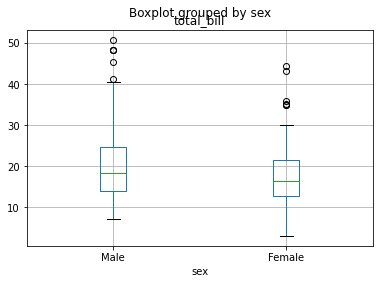

In [22]:
tips.boxplot(column='total_bill',by='sex')

**Scatter Plot**散佈圖

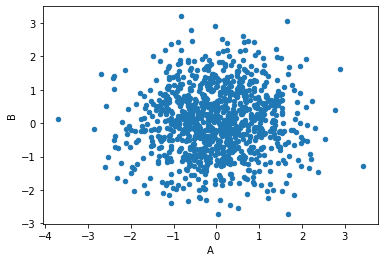

In [23]:
df1.plot.scatter(x='A',y='B')

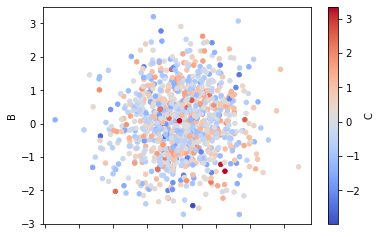

In [24]:
# color based off another column value
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm')

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


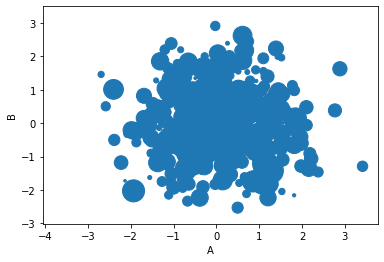

In [25]:
df1.plot.scatter(x='A',y='B',s=df1['C']*200)

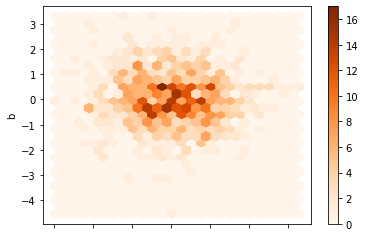

In [26]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df.plot.hexbin(x='a',y='b',gridsize=25,cmap='Oranges')

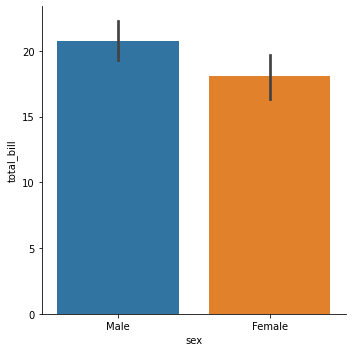

In [27]:
sns.catplot(x='sex',y='total_bill',data=tips, kind="bar")

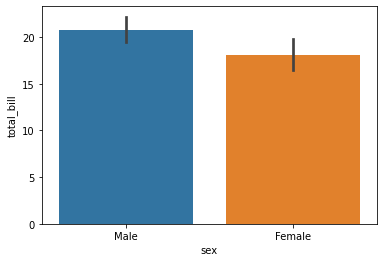

In [28]:
sns.barplot(x='sex',y='total_bill',data=tips)

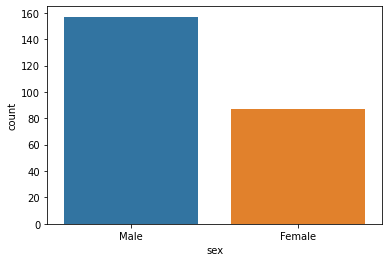

In [29]:
sns.countplot(x='sex',data=tips)

In [31]:
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

NameError: name 'plt' is not defined

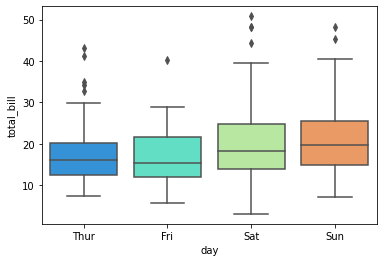

In [32]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')
# palette='rainbow'改顏色

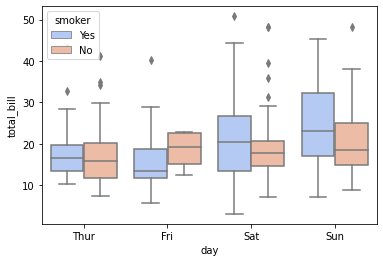

In [33]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

In [34]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


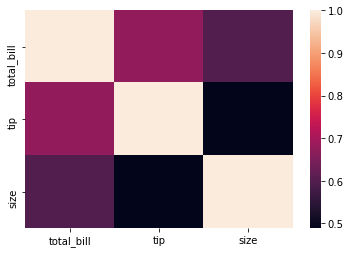

In [35]:
sns.heatmap(tips.corr())

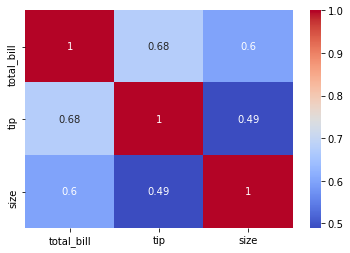

In [36]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

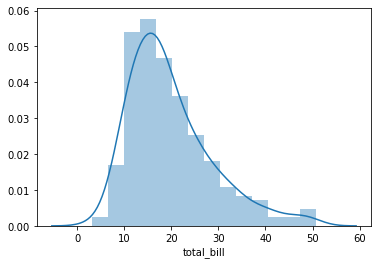

In [37]:
sns.distplot(tips['total_bill']) # Safe to ignore warnings

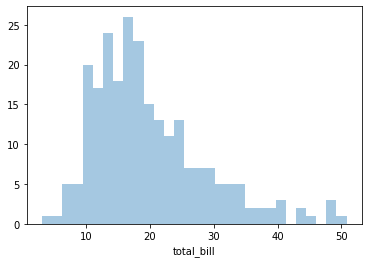

In [38]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

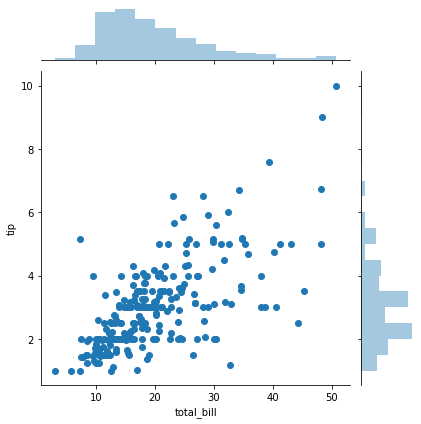

In [39]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

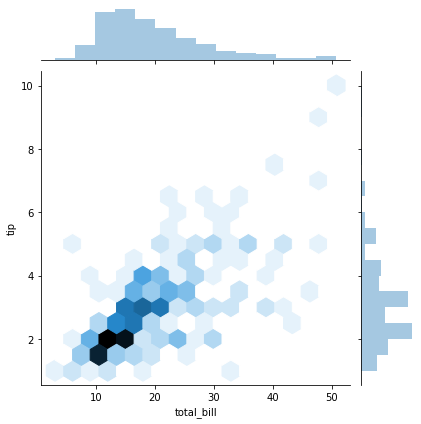

In [40]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

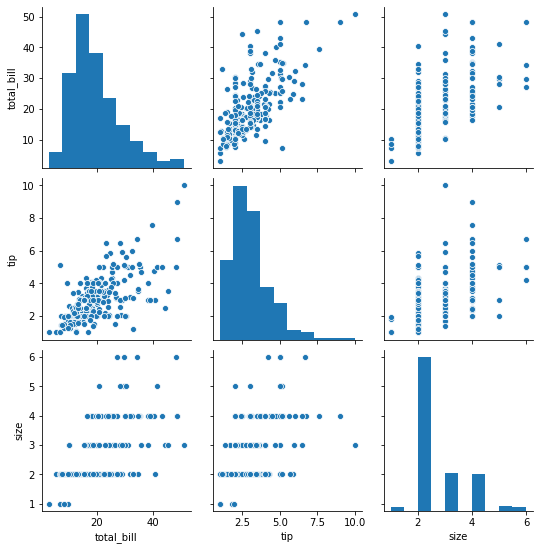

In [41]:
sns.pairplot(tips)

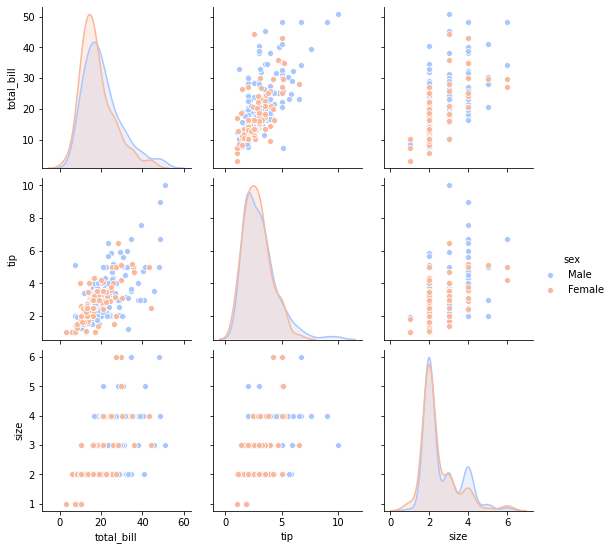

In [42]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

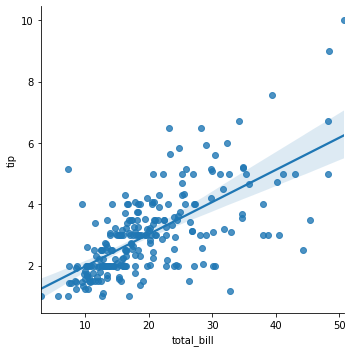

In [43]:
sns.lmplot(x='total_bill',y='tip',data=tips)

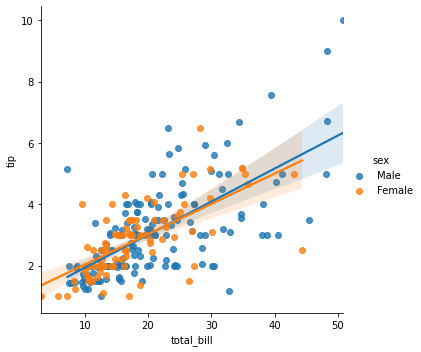

In [44]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

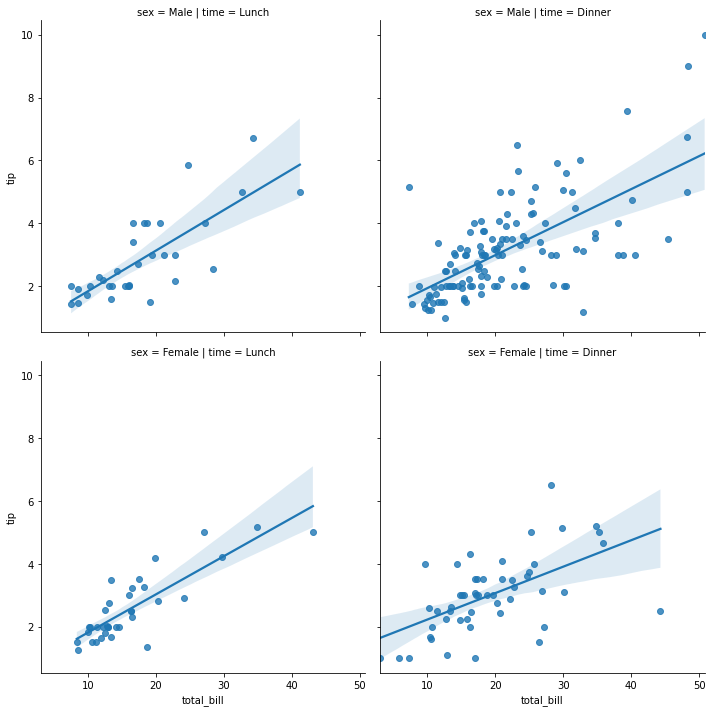

In [45]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

In [46]:
import matplotlib.pyplot as plt

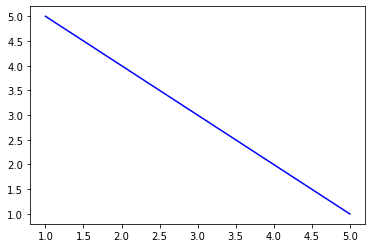

In [47]:
x=[5,4,3,2,1]
y=[1,2,3,4,5]
plt.plot(x,y,color='blue')
plt.show()

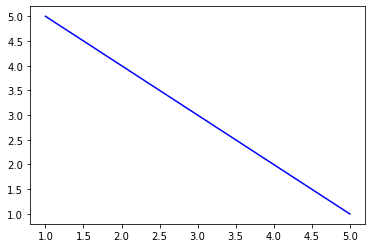

In [48]:
# alternative
plt.plot(x,y,color='#0000ff')
plt.show()

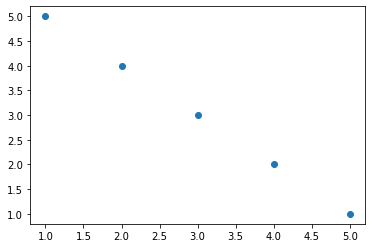

In [49]:
plt.plot(x,y,'o')

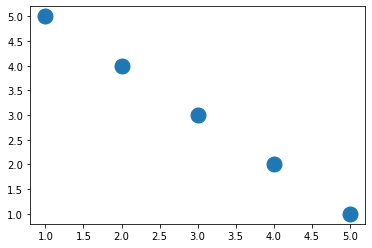

In [50]:
plt.plot(x,y,'o',markersize=15)

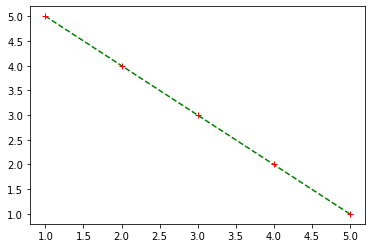

In [51]:
plt.plot(x,y,color='g',linestyle='dashed',markeredgecolor='r',marker='+')

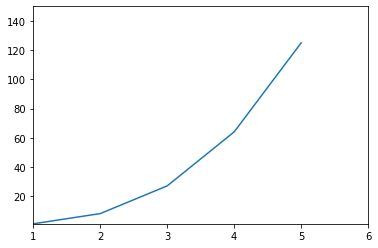

In [52]:
x=np.array([5,4,3,2,1])
y=pow(x,3)
plt.axis([1,6,1,150])
plt.plot(x,y)
plt.show()

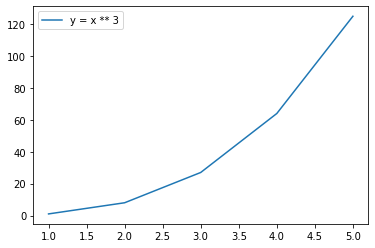

In [53]:
plt.plot(x,y,label='y = x ** 3')
plt.legend()

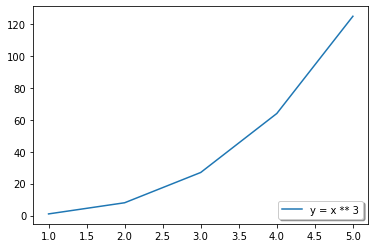

In [54]:
plt.plot(x,y,label='y = x ** 3')
plt.legend(loc=4,shadow=True)

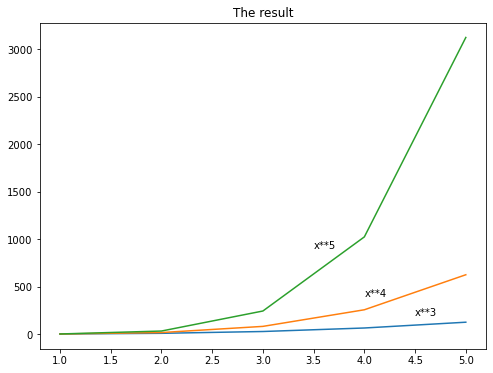

In [55]:
z=pow(x,4)
w=pow(x,5)
plt.figure(figsize=(8,6))
plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,w)
plt.title("The result")
plt.text(4.5,200,'x**3')
plt.text(4,400,'x**4')
plt.text(3.5,900,'x**5')
plt.show()

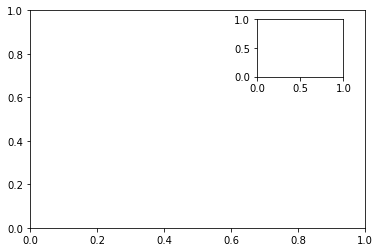

In [56]:
plt.subplots()
plt.axes()
plt.axes([0.65,0.65,0.2,0.2])

# Exercise
使用TITANIC的資料繪圖

In [57]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**繪製age的直方圖, 區間值設為30**

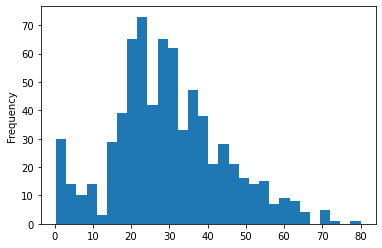

In [58]:
df['age'].plot.hist(bins=30)

**製作survived和sex的交叉表**

In [59]:
df.groupby(['survived','sex']).size().unstack(1)

sex,female,male
survived,,
0,81,468
1,233,109


**將結果製成圖**

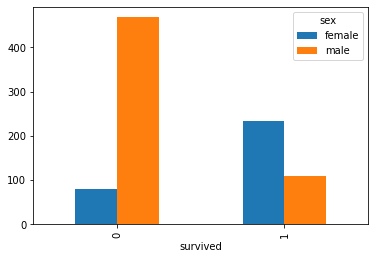

In [60]:
df.groupby(['survived','sex']).size().unstack(1).plot(kind='bar')

**製作survived和age的圖。將依存活與否分成兩組，再將兩組的資料分別用直方圖來呈現。畫在同一格表格上**

survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

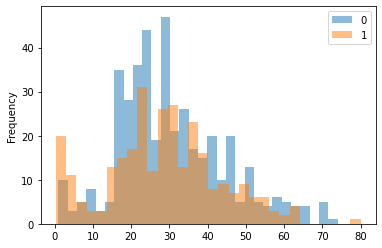

In [61]:
df.groupby('survived')['age'].plot(kind='hist', bins=30, alpha=0.5, legend=True)

**用箱型圖來呈現**

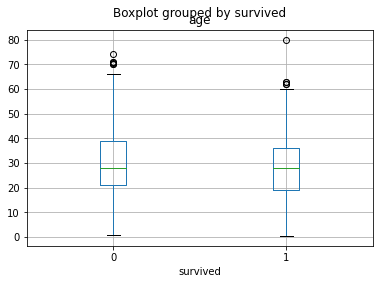

In [62]:
df.boxplot(column='age',by='survived')

**自由發揮, 至少再繪製3個不同的圖,並解釋其用意**

In [63]:
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


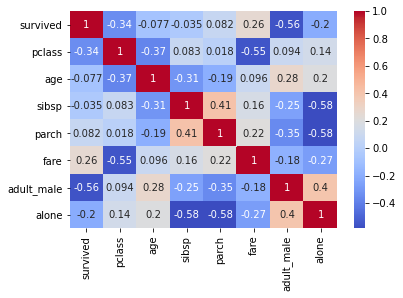

In [64]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [65]:
df.groupby(['age','sex']).size().unstack(1)

sex,female,male
age,,
0.42,NaN,1.0
0.67,NaN,1.0
0.75,2.0,NaN
0.83,NaN,2.0
0.92,NaN,1.0
...,...,...
70.00,NaN,2.0
70.50,NaN,1.0
71.00,NaN,2.0


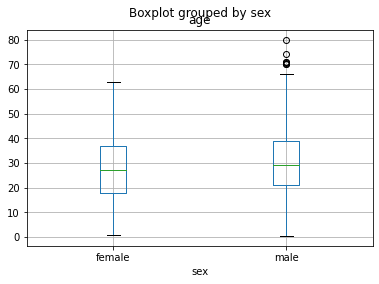

In [66]:
df.boxplot(column='age',by='sex')

sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

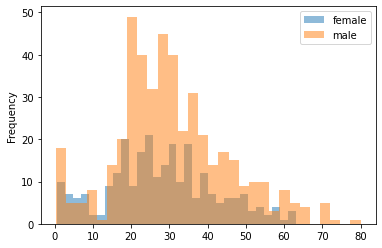

In [67]:
df.groupby('sex')['age'].plot(kind='hist', bins=30, alpha=0.5, legend=True)